In [1]:
library(SeuratDisk)
library(scGOclust)
library(Seurat)
library(tidyverse)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ p

In [2]:
options(repr.plot.width = 12, repr.plot.height = 10)

In [3]:
mmu_obj <- LoadH5Seurat("mmu_go_obj_no_IEA.h5seurat")
dme_obj <- LoadH5Seurat("dme_go_obj_no_IEA.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [4]:
mmu_obj
dme_obj

An object of class Seurat 
12304 features across 7402 samples within 1 assay 
Active assay: RNA (12304 features, 0 variable features)
 2 layers present: counts, data

An object of class Seurat 
5283 features across 5086 samples within 1 assay 
Active assay: RNA (5283 features, 0 variable features)
 2 layers present: counts, data

In [5]:
head(mmu_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,age,cell_type,developmental_stage,genotype,organism_part,organism,sex,⋯,louvain_resolution_4.0,louvain_resolution_5.0,cell_type_ontology_label,species,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,cell_ontology_base,cell_ontology_mapped
,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
ERR3971670-TGACTTTCATGCCCGA,SeuratProject,19209,4919,10 week,cardiac non-myocyte and cardiomyocyte,adult,wild type genotype,heart,Mus musculus,mixed,⋯,46,57,macrophage,mmusculus,22.57368,30.59895,41.36958,56.83399,macrophage,macrophage
ERR3971670-TTCTCCTAGGCGATAC,SeuratProject,22685,5641,10 week,cardiac non-myocyte and cardiomyocyte,adult,wild type genotype,heart,Mus musculus,mixed,⋯,44,53,endocardial cell,mmusculus,19.35067,27.40658,37.54792,52.97218,cardiac endothelial cell,endothelial cell
ERR3971670-GTGAAGGGTTGCCTCT,SeuratProject,20276,5462,10 week,cardiac non-myocyte and cardiomyocyte,adult,wild type genotype,heart,Mus musculus,mixed,⋯,53,67,proliferating cell,mmusculus,18.74714,25.92378,35.48768,50.26242,proliferating cell,proliferating cell
ERR3971670-CCGGGATCACACATGT,SeuratProject,18464,4422,10 week,cardiac non-myocyte and cardiomyocyte,adult,wild type genotype,heart,Mus musculus,mixed,⋯,5,2,macrophage,mmusculus,30.90728,41.61010,52.20857,64.95022,macrophage,macrophage
ERR3971670-AACTCAGCAGCGAACA,SeuratProject,20134,5142,10 week,cardiac non-myocyte and cardiomyocyte,adult,wild type genotype,heart,Mus musculus,mixed,⋯,24,24,fibroblast,mmusculus,20.50181,30.56669,41.89798,56.76495,fibroblast,fibroblast
ERR3971670-CAGTAACCAATCCAAC,SeuratProject,18976,5245,10 week,cardiac non-myocyte and cardiomyocyte,adult,wild type genotype,heart,Mus musculus,mixed,⋯,48,61,mesothelial cell of epicardium,mmusculus,17.53562,27.76587,39.40984,53.74198,mesothelial cell of epicardium,mesothelial cell of epicardium


In [6]:
length(rownames(mmu_obj$RNA))

[1] 12304

In [7]:
length(rownames(dme_obj$RNA))

[1] 5283

In [23]:
## analyse shared GO BP features

In [8]:
dme_obj = dme_obj[which(rownames(dme_obj$RNA) %in% rownames(mmu_obj$RNA)), ]

In [9]:
dme_obj

An object of class Seurat 
4113 features across 5086 samples within 1 assay 
Active assay: RNA (4113 features, 0 variable features)
 2 layers present: counts, data

In [10]:
mmu_obj = mmu_obj[which(rownames(mmu_obj$RNA) %in% rownames(dme_obj)), ]

In [11]:
mmu_obj


An object of class Seurat 
4113 features across 7402 samples within 1 assay 
Active assay: RNA (4113 features, 0 variable features)
 2 layers present: counts, data

In [12]:
## function for running seurat clustering

In [13]:
mmu_obj <- analyzeGOSeurat(mmu_obj, cell_type_col = 'cell_ontology_base')

perform normalization and log1p for mmu_obj

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7402
Number of edges: 356223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8432
Number of communities: 19
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:38:43 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:38:43 Read 7402 rows and found 50 numeric columns

12:38:43 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:38:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:38:44 Writing NN index file to t

In [17]:
Seurat::Idents(mmu_obj) <-  mmu_obj@meta.data[['cell_ontology_base']]

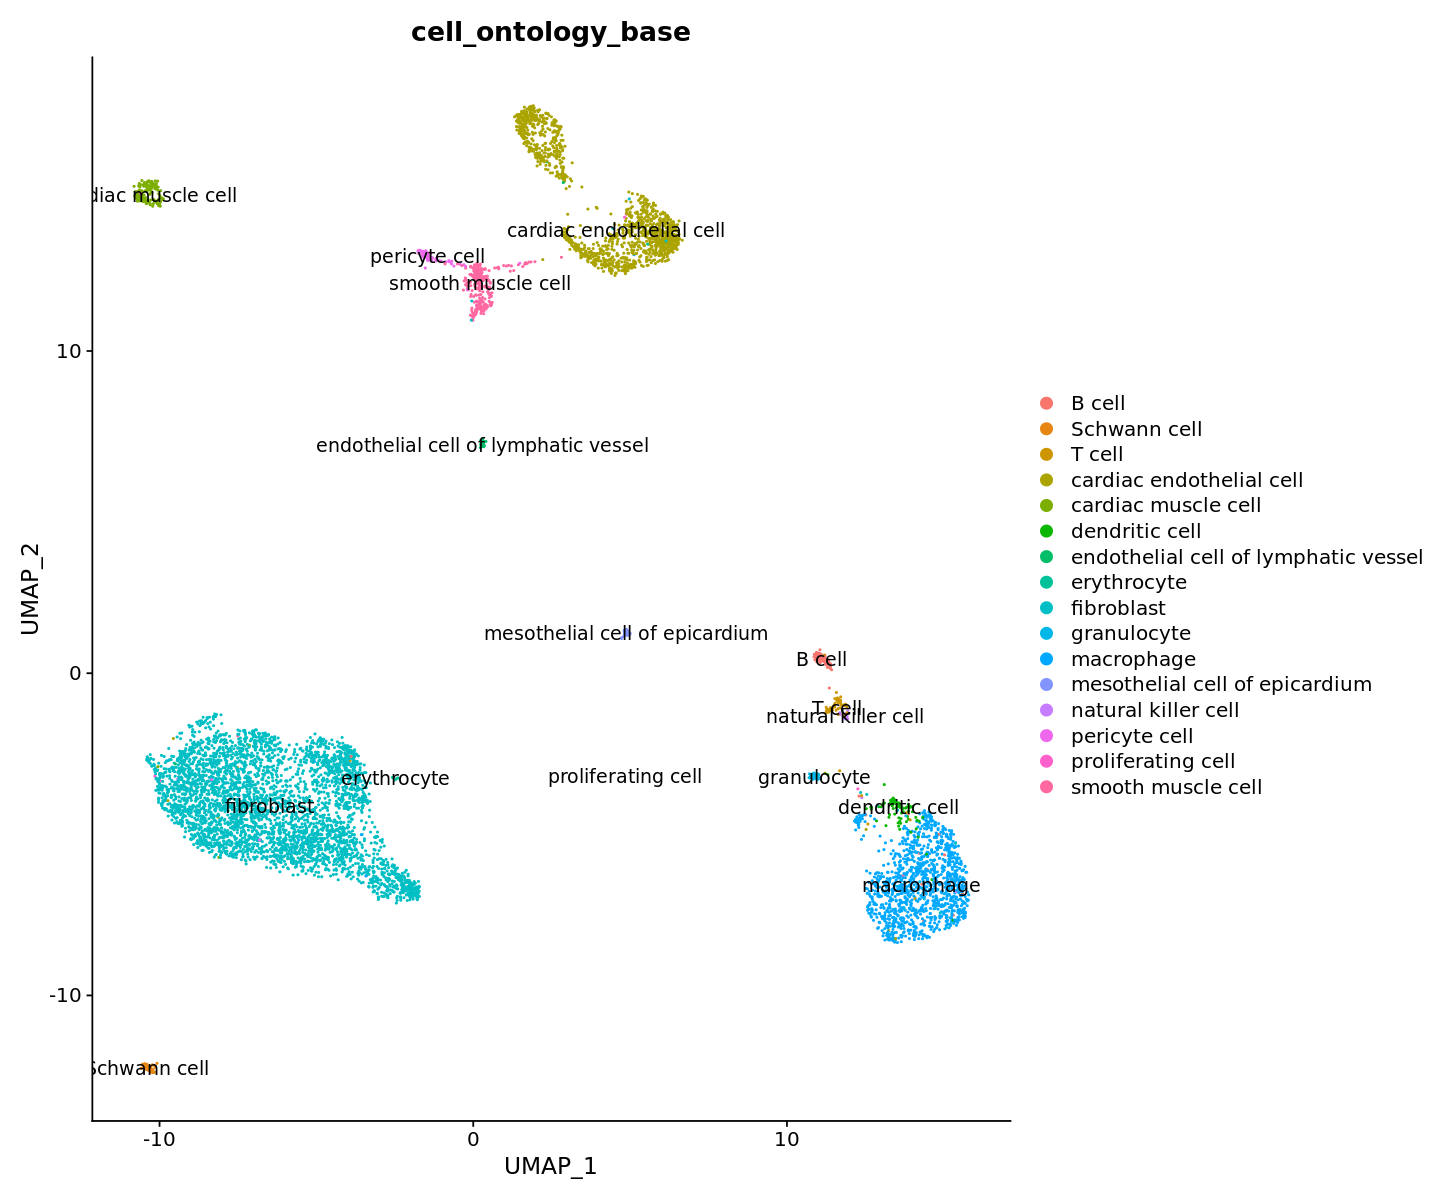

In [19]:
DimPlot(mmu_obj, label = TRUE, group.by = 'cell_ontology_base')

In [20]:
dme_obj <- analyzeGOSeurat(dme_obj, cell_type_col = 'annotation')

perform normalization and log1p for dme_obj

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5086
Number of edges: 273721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8457
Number of communities: 13
Elapsed time: 0 seconds


12:41:29 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:41:29 Read 5086 rows and found 50 numeric columns

12:41:29 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:41:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:41:29 Writing NN index file to temp file /tmp/RtmpzCxR4v/file2d282019574777

12:41:29 Searching Annoy index using 1 thread, search_k = 3000

12:41:31 Annoy recall = 100%

12:41:31 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:41:32 Initializing from normalized Laplacian +

In [21]:
Seurat::Idents(dme_obj) <-  dme_obj@meta.data[['annotation']]

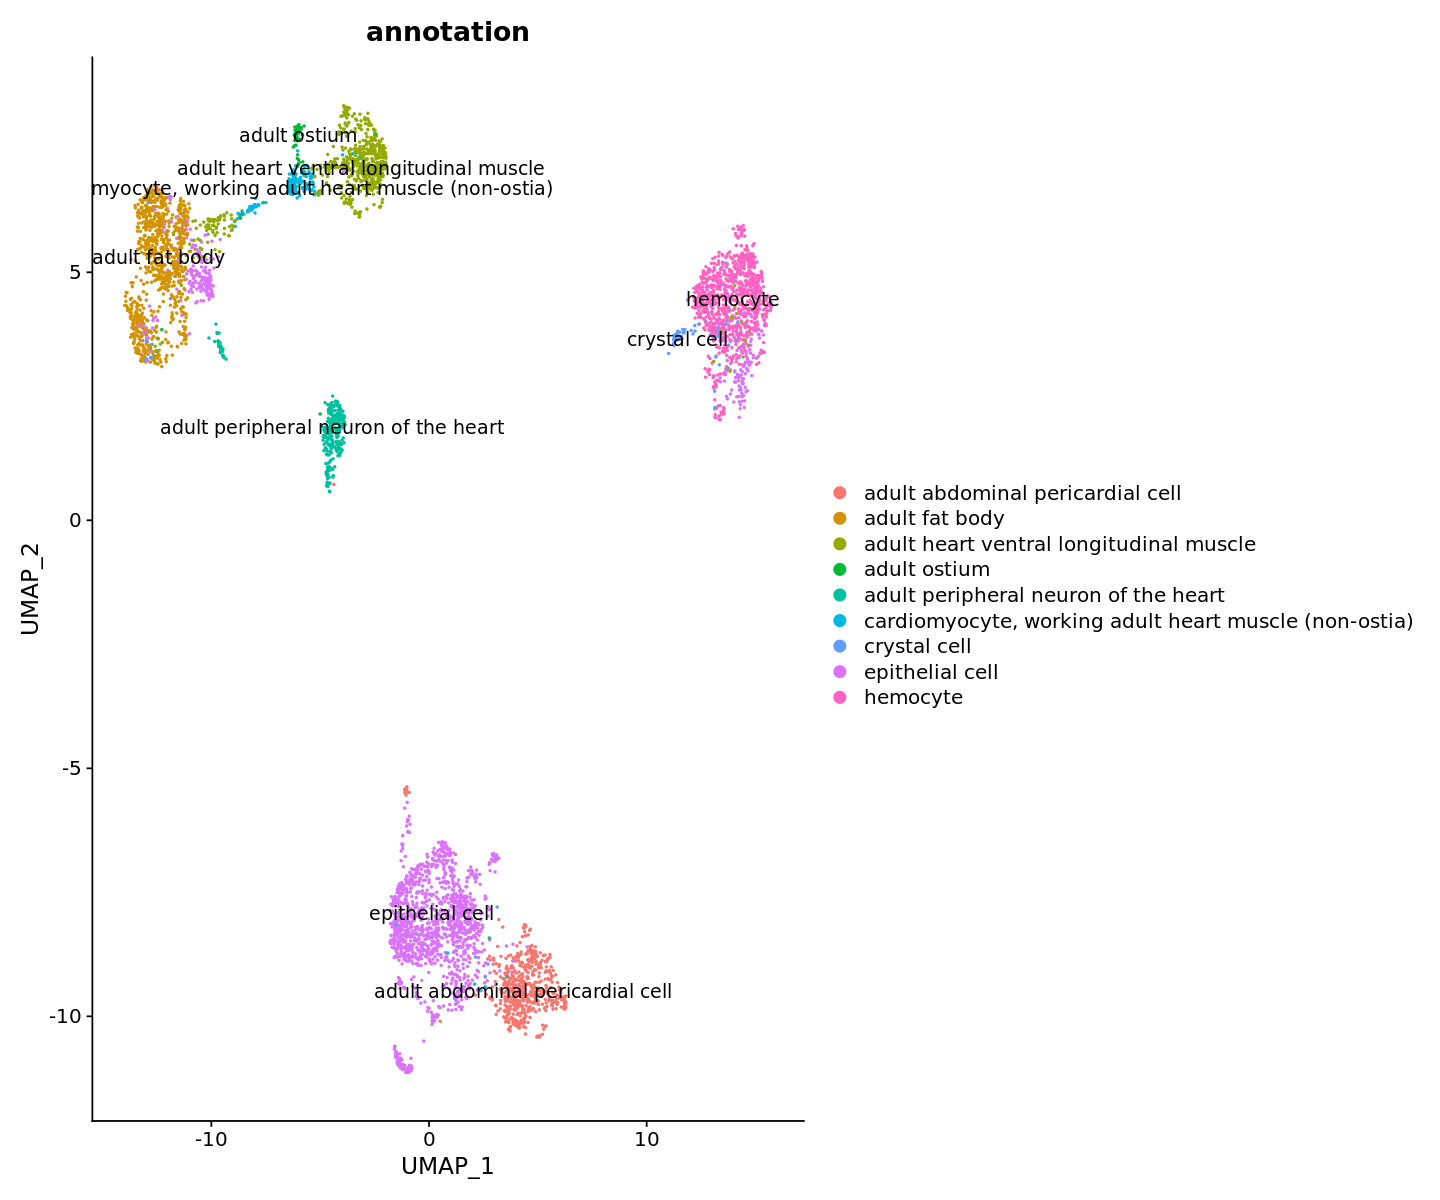

In [22]:
DimPlot(dme_obj, label = TRUE, group.by = 'annotation')

In [24]:
mmu_scaled_avg = AverageExpression(
  mmu_obj,
  assays = 'RNA',
  features = NULL,
  return.seurat = FALSE,
  group.by = "cell_ontology_base",
  slot = "scale.data",
  verbose = TRUE,

)

In [25]:
dme_scaled_avg = AverageExpression(
  dme_obj,
  assays = 'RNA',
  features = NULL,
  return.seurat = FALSE,
  group.by = "annotation",
  slot = "scale.data",
  verbose = TRUE,
)

In [26]:
corr = scGOclust::crossSpeciesCellTypeGOCorr(species_1 = 'mmusculus', species_2 = 'dmelanogaster', cell_type_go_sp1 = mmu_scaled_avg$RNA, cell_type_go_sp2 = dme_scaled_avg$RNA)

In [27]:
rownames(corr) = gsub(".*_", '', rownames(corr))
colnames(corr) = gsub(".*_", '', colnames(corr))

In [32]:
corr

,adult abdominal pericardial cell,adult fat body,adult heart ventral longitudinal muscle,adult ostium,adult peripheral neuron of the heart,"cardiomyocyte, working adult heart muscle (non-ostia)",crystal cell,epithelial cell,hemocyte
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B cell,0.035981074,0.032135554,-0.0314459506,-0.045746789,-0.0008696370,-0.045822302,0.0354960501,-0.001413296,-0.028918065
Schwann cell,0.007250048,-0.066477815,0.0043584783,0.050137239,0.1132692743,0.046446770,-0.0323298363,0.004511424,-0.001297809
T cell,0.028060840,0.010261193,0.0002500377,-0.026379250,-0.0170377216,-0.045686776,0.0550765646,0.017478269,-0.039286163
cardiac endothelial cell,-0.016631464,-0.070467135,0.0128343368,0.038076101,-0.0005358479,0.026517038,-0.0087731554,0.037984693,0.034518617
cardiac muscle cell,-0.030403379,0.101228886,0.1104235309,0.097083682,0.0334663086,0.142862855,-0.0842594146,-0.075388994,-0.142164459
dendritic cell,0.052295382,0.022465157,-0.0654775306,-0.068054345,-0.0165992624,-0.070241433,0.0523596067,-0.003993122,0.014771479
endothelial cell of lymphatic vessel,0.018318437,-0.086978300,0.0389271912,0.043496997,0.0212241074,0.059384048,-0.0153977499,-0.011029328,0.045129140
erythrocyte,0.109819566,-0.003448915,-0.0376197038,-0.035798785,0.0572674420,-0.036238684,-0.0335482486,0.008223029,-0.084521607
fibroblast,-0.008152682,0.008608367,0.0184164980,-0.007020364,-0.0102462846,-0.003526790,0.0069510640,0.005506804,-0.020384669


In [28]:
options(repr.plot.width = 6.5, repr.plot.height = 9)

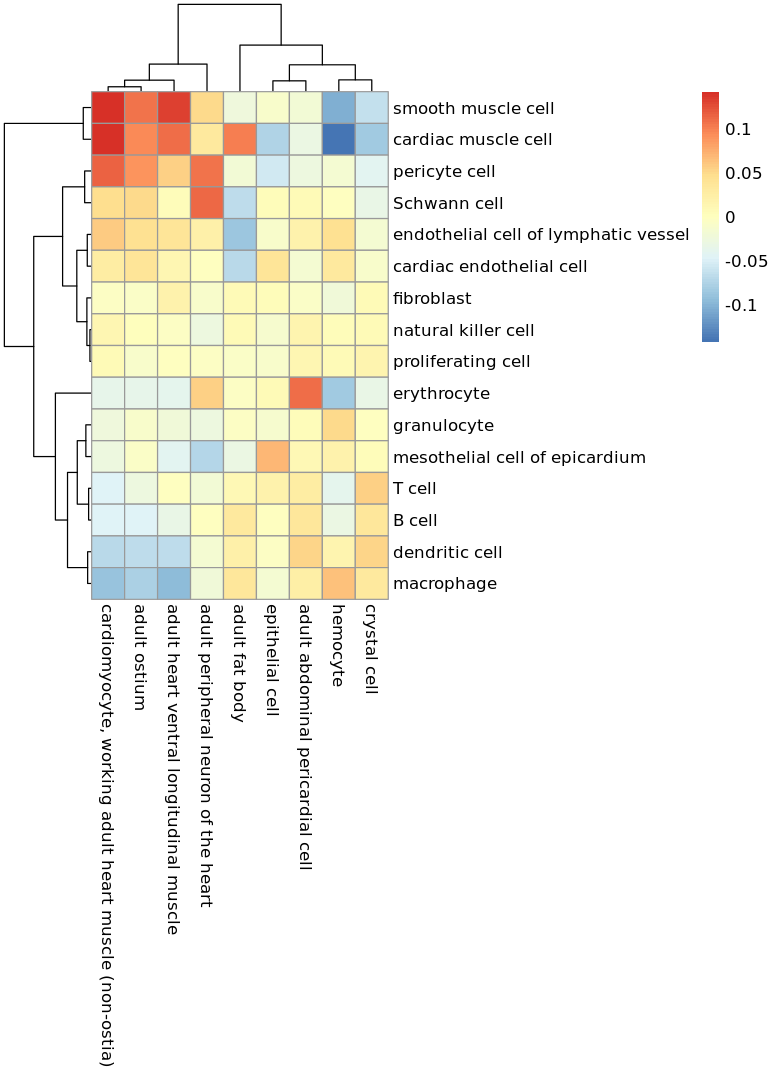

In [29]:
corr_fig = scGOclust::plotCellTypeCorrHeatmap(corr_matrix = corr)

In [31]:
shared_go_terms = getCellTypeSharedGO(species_1 = 'mmusculus', species_2 = 'dmelanogaster', 
                    cell_type_col_sp1 = 'cell_ontology_base', 
                    cell_type_col_sp2 = 'annotation',
                    analyzed_go_seurat_sp1 = mmu_obj, 
                    analyzed_go_seurat_sp2 = dme_obj
                       )

calculate cell type marker for species mmusculus, this will take a while

Calculating cluster B cell

Calculating cluster Schwann cell

Calculating cluster T cell

Calculating cluster cardiac endothelial cell

Calculating cluster cardiac muscle cell

Calculating cluster dendritic cell

Calculating cluster endothelial cell of lymphatic vessel

Calculating cluster erythrocyte

Calculating cluster fibroblast

Calculating cluster granulocyte

Calculating cluster macrophage

Calculating cluster mesothelial cell of epicardium

Calculating cluster natural killer cell

Calculating cluster pericyte cell

Calculating cluster proliferating cell

Calculating cluster smooth muscle cell

calculate cell type marker for species dmelanogaster, this will take a while

Calculating cluster adult abdominal pericardial cell

Calculating cluster adult fat body

Calculating cluster adult heart ventral longitudinal muscle

Calculating cluster adult ostium

Calculating cluster adult peripheral neuron of the hea

In [37]:
head(shared_go_terms$shared_sig_markers )

,gene,p_val_sp1,avg_log2FC_sp1,pct.1_sp1,pct.2_sp1,p_val_adj_sp1,cluster_sp1,marker_type_sp1,pct_intersect_sp1,p_val_sp2,avg_log2FC_sp2,pct.1_sp2,pct.2_sp2,p_val_adj_sp2,cluster_sp2,marker_type_sp2,pct_intersect_sp2,species_1,species_2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<chr>,<chr>
1,antibacterial humoral response,4.609657e-21,0.4447044,1,0.999,1.895952e-17,B cell,sig_up,0.09668508,1.112350e-39,0.5513491,0.875,0.918,4.575096e-36,adult abdominal pericardial cell,sig_up,0.1417004,mmusculus,dmelanogaster
2,cellular response to DNA damage stimulus,1.493673e-32,0.4397661,1,1.000,6.143479e-29,B cell,sig_up,0.09668508,5.944469e-61,0.7569827,0.801,0.822,2.444960e-57,adult abdominal pericardial cell,sig_up,0.1417004,mmusculus,dmelanogaster
3,cellular response to heat,4.215569e-07,0.4146851,1,1.000,1.733863e-03,B cell,sig_up,0.09668508,8.997419e-11,0.2835062,0.810,0.910,3.700638e-07,adult abdominal pericardial cell,sig_up,0.1417004,mmusculus,dmelanogaster
4,cytoplasmic translation,1.355029e-54,1.1271017,1,1.000,5.573232e-51,B cell,sig_up,0.09668508,4.019839e-81,0.5560245,1.000,1.000,1.653360e-77,adult abdominal pericardial cell,sig_up,0.1417004,mmusculus,dmelanogaster
5,defense response to Gram-negative bacterium,8.332536e-22,0.4275598,1,1.000,3.427172e-18,B cell,sig_up,0.09668508,1.104287e-41,0.3652460,0.991,0.998,4.541932e-38,adult abdominal pericardial cell,sig_up,0.1417004,mmusculus,dmelanogaster
6,G1 to G0 transition,1.384590e-33,0.8673370,1,0.965,5.694820e-30,B cell,sig_up,0.09668508,0.000000e+00,2.2648244,0.784,0.183,0.000000e+00,adult abdominal pericardial cell,sig_up,0.1417004,mmusculus,dmelanogaster


In [41]:
shared_go_terms$shared_sig_markers %>% saveRDS("heart_annotated_cell_types_shared_terms.rds")


In [43]:
shared_go_terms$shared_sig_markers %>% write_csv("heart_annotated_cell_types_shared_terms.csv")

In [44]:
shared_go_terms %>% saveRDS("markers_and_shared_sig_markers_heart.rds")

In [42]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.5 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /nfs/research/icortes/ysong/anaconda3/envs/R4.3/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/London
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.2       forcats_1.0.0         stringr_1.5.0        
 [4] dplyr_1.1.3           purrr_1.0.2           readr_2.1.4          
 [7] tidyr_1.3.0           tibble_3.2.1          ggplot2